<a href="https://colab.research.google.com/github/hamednasr/deep-learning/blob/main/my_code_GAN_FMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GANs for FashionMNIST

In [21]:
# import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from PIL import Image

import sys

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

In [ ]:
# device = 'cpu'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

# Import the data

In [26]:
FashionMNIST = torchvision.datasets.FashionMNIST(root='sample_data',download=True)

In [27]:
FashionMNIST

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: sample_data
    Split: Train

In [29]:
FashionMNIST.data.shape

torch.Size([60000, 28, 28])

In [36]:
FashionMNIST.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

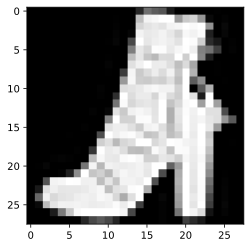

In [51]:
plt.imshow(FashionMNIST.data[11,:,:],cmap='gray')

In [43]:
FashionMNIST[11]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FC04B215250>, 9)

In [44]:
FashionMNIST[11][0]

In [49]:
FashionMNIST[11][1]

9

In [59]:
data = FashionMNIST.data
labels = FashionMNIST.targets

In [61]:
dataNorm = data / data.max()
dataNorm = 2 * dataNorm - 1

In [64]:
dataT = torch.FloatTensor(dataNorm)

In [ ]:
batchsize = 100

# Create classes for the discriminator and generator